In [79]:
!pip install tabulate;
#Imports:
import functions as fx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate

%matplotlib inline

In [80]:
activities = fx.csv_to_df('export_activities.csv')

In [81]:
activities

,id,user_id,type,value,activityable_id,activityable_type,activity_at,created_at,updated_at
0,0000125d-e98a-4608-87d8-5e56dcdfb395,0bfb73db-f654-4fdf-a9a6-5fc0a48d8e1d,route,"b'{""to_route"":""\\/missie\\/CT\\/53c6784a-a401-...",NaN,NaN,2021-06-16 09:40:55,2021-06-16 09:40:55,2021-06-16 09:40:55
1,00002606-b1c0-4056-808a-1434f98f85e2,446f5ba9-d624-43f0-aac3-d6098d7fae2f,route,"b'{""to_route"":""https:\\/\\/docent.codeskillz.n...",NaN,NaN,2021-03-19 10:03:17,2021-03-19 10:03:17,2021-03-19 10:03:17
2,000071c9-5fdb-4106-8698-c7158a54bb91,90b4c7a4-f576-4c5d-80de-641fab894d75,primm-hint,"b'{""hint"":null,""levelId"":""387426b7-35c2-42d4-a...",NaN,NaN,2020-09-15 06:47:55,2020-09-15 06:47:54,2020-09-15 06:47:54
3,00007a53-b454-4c2b-b43e-828d3bfae177,bd915fc1-bc03-4b5f-968e-a470ab2c7c77,answer,"b'[{""content"":""Cookies verwijderen na sessie"",...",16865.0,App\AnswerActivity,2020-04-09 07:36:18,2020-04-09 07:36:18,2020-04-09 07:36:18
4,00007d04-88a6-4abb-bf29-6a486e01b467,c34e0d61-d723-4a83-83cd-0048aa1ef5d9,primm-hint,"b'{""hint"":null,""levelId"":""d28cb65e-2d59-4bdc-8...",NaN,NaN,2020-10-12 10:20:57,2020-10-12 10:20:57,2020-10-12 10:20:57
...,...,...,...,...,...,...,...,...,...
495917,ffff7d17-272d-4387-a924-93c5a21641fa,25c606d1-9599-4214-adf4-9c1e89d8fb0c,run-code,"b'{""answer"":""\\/\\/ maak de code zelf af!\\nop...",NaN,NaN,2020-09-14 10:26:01,2020-09-14 10:26:03,2020-09-14 10:26:03
495918,ffff8b71-1d44-4cc0-84e2-24da283e653f,de6fa4ee-2cc2-452b-aebc-8a508a401814,answer,"b'{""content"":""Software"",""hint"":{""content"":""Ja ...",136673.0,App\AnswerActivity,2020-10-10 16:00:29,2020-10-10 16:00:29,2020-10-10 16:00:29
495919,ffffa7fc-07c3-4ff6-9ae0-21a942b2ad29,75e75b20-b20c-465a-9532-9e3cc1e8c36d,answer,"b'[{""content"":""Wat nepnieuws en andere typen t...",224017.0,App\AnswerActivity,2021-04-29 06:27:51,2021-04-29 06:27:51,2021-04-29 06:27:51
495920,ffffbb4f-4aa2-439c-bf28-79548bf84f88,585a4bac-b056-414c-9a01-fdd432840619,answer,1,30022.0,App\AnswerActivity,2020-05-08 08:40:27,2020-05-08 08:40:27,2020-05-08 08:40:27


In [82]:
#loading in the data
sessions = fx.csv_to_df('sessions.csv')
student_ids = sessions['student_id']
sessions.drop('primm_hint',axis=1 ,inplace=True)

students = fx.csv_to_df('students_averaged.csv')
students.set_index('student_id',inplace=True)
students.drop('primm_hint',axis=1 ,inplace=True)

students

,interval,stars,scores,clippy_hint,block_try_counter
student_id,,,,,
00823529-459a-49e3-89dd-0fd3bab69d1d,30.836879,1.133333,0.627456,1.000000,1.606579
0089f530-a8d3-4b95-be12-f28fc9387774,43.382353,2.000000,0.859694,1.000000,1.088235
00955978-dd74-4903-87b9-19d5c78f9f63,40.517628,3.000000,0.668523,0.000000,2.083333
00dadd1d-87fe-4ed8-8d0d-acf9c529f048,42.083916,2.100000,0.712296,0.600000,1.882135
00f24922-6343-491b-943a-731d078c2250,46.008536,3.000000,0.817337,0.250000,1.541495
...,...,...,...,...,...
ff362d69-ae50-4f08-970b-b025ad51b416,20.514477,1.666667,0.654697,0.857143,2.359328
ff5fe464-0152-405b-9f6e-8a9db2ad3caf,27.085185,0.666667,0.634499,0.000000,1.488889
ff89169f-fec6-4a0d-8461-79c6e80f7d1d,25.382418,1.500000,0.615163,0.000000,1.834242


In [83]:
#check columns
for column in sessions.columns:
    print(column)
    
print(len(sessions.columns))

activity_no
interval
stars
scores
clippy_hint
block_try_counter
activity_type_answer
activity_type_level-complete
mission_name_Mediawijsheid
level_type_continuous_mission
level_type_ruec_quiz
level_type_ruec_research
block_type_question_check_list
block_type_question_fill_in_the_blank
block_type_question_multiple_choice
block_type_question_number
block_type_question_place_in_order
block_type_question_study_group_list
block_type_question_text_list
block_type_question_text_long
block_type_question_text_short
student_id
student_no
student_level
size
activity_type_clippy
level_type_ruec_present
block_type_question_link
block_type_question_upload
level_type_ruec_use
activity_type_primm-hint
mission_name_Computational Thinking
level_type_primm_create
level_type_primm_modify
level_type_primm_predict
level_type_primm_quiz
level_type_primm_use
block_type
38


In [84]:
#eyeball through data
sessions

,activity_no,interval,stars,scores,clippy_hint,block_try_counter,activity_type_answer,activity_type_level-complete,mission_name_Mediawijsheid,level_type_continuous_mission,...,block_type_question_upload,level_type_ruec_use,activity_type_primm-hint,mission_name_Computational Thinking,level_type_primm_create,level_type_primm_modify,level_type_primm_predict,level_type_primm_quiz,level_type_primm_use,block_type
0,3,0.032154,2.0,0.627473,0.0,0.200000,0.933333,0.066667,1.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,43.640000,2.0,0.585227,1.0,1.720000,0.920000,0.040000,1.0,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,70.700000,3.0,0.888889,0.0,1.000000,0.900000,0.100000,1.0,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,23.342105,3.0,0.680952,0.0,3.631579,0.973684,0.026316,1.0,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,16.421053,0.0,0.619298,0.0,2.736842,1.000000,0.000000,1.0,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,1,31.310345,3.0,0.684990,1.0,2.000000,0.896552,0.034483,1.0,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8293,4,44.066667,3.0,0.785714,0.0,1.000000,0.933333,0.066667,1.0,0.133333,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8294,7,17.666667,3.0,0.361095,0.0,3.212121,0.969697,0.030303,1.0,0.090909,...,0.030303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8295,2,36.166667,1.0,0.444444,1.0,1.611111,0.888889,0.055556,1.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
data = sessions[sessions.columns.difference(['student_no','size','student_id', 'student_level','activity_no','block_type'])].fillna(0)
print('there are {} columns in the data'.format(len(data.columns)))

there are 32 columns in the data


In [86]:
print('there are {} columns in the students dataframe'.format(len(students.columns)))

def sort_dict_on_keys(dictio):
    return sorted(dictio.items(), key=lambda x: x[1], reverse=True) 

there are 5 columns in the students dataframe


# kmeans pipeline

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [88]:
# Preprocessing Part of the pipeline:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

# Clustering Part of the pipeline:
kmeans = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=2,
               init="k-means++", #k-means++ ensures that the initial centroids have some distance between them
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

# Assembling the pipeline:
kmeans_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", kmeans)
    ]
)

#fitting the Pipeline to the data:
kmeans_pipe.fit(students)

preprocessed_data = kmeans_pipe["preprocessor"].transform(students)
predicted_labels = kmeans_pipe["clusterer"]["kmeans"].labels_
print(kmeans_pipe['clusterer']['kmeans'].n_clusters, 
      'clusters and',
      kmeans_pipe['preprocessor']['pca'].n_components,
      'pca components; give silhouette score of:',
      silhouette_score(preprocessed_data, predicted_labels))


2 clusters and 2 pca components; give silhouette score of: 0.36089905663888516


In [89]:
type(students)

pandas.core.frame.DataFrame

In [90]:
components = [2,3,4,5]
clusters = [i for i in range(2,9)]

kmeans_silhouette_scores = {}

for n_components in components:
    for n_clusters in clusters:
        
        kmeans_pipe['preprocessor']['pca'].n_components = n_components
        kmeans_pipe['clusterer']['kmeans'].n_clusters = n_clusters
        
        kmeans_pipe.fit(students)

        preprocessed_data = kmeans_pipe["preprocessor"].transform(students)
        predicted_labels = kmeans_pipe["clusterer"]["kmeans"].labels_
        
        kmeans_silhouette_scores['{}components{}clusters'.format(kmeans_pipe['preprocessor']['pca'].n_components, kmeans_pipe['clusterer']['kmeans'].n_clusters)] = silhouette_score(preprocessed_data, predicted_labels)

kmeans_silhouette_scores = sort_dict_on_keys(kmeans_silhouette_scores)     
print('highest silhouette_score for kmeans:',kmeans_silhouette_scores[0])



highest silhouette_score for kmeans: ('2components3clusters', 0.3697681505642192)


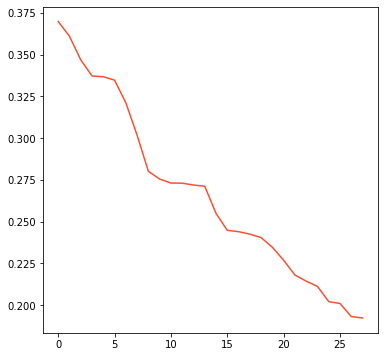

In [91]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(len(kmeans_silhouette_scores)),
    [score[1] for score in kmeans_silhouette_scores],
    c="#fc4f30",
    label="agglomerative_clustering",
)

In [92]:
kmeans_silhouette_scores

[('2components3clusters', 0.3697681505642192),
 ('2components2clusters', 0.36089905663888516),
 ('2components4clusters', 0.3468206003992899),
 ('2components5clusters', 0.3371660722789946),
 ('2components8clusters', 0.3367107656401009),
 ('2components7clusters', 0.33464766714766286),
 ('2components6clusters', 0.32115932724411517),
 ('3components4clusters', 0.3017269053783709),
 ('3components3clusters', 0.28011642028734046),
 ('3components7clusters', 0.27549114040152833),
 ('3components6clusters', 0.27310072823720194),
 ('3components2clusters', 0.27301226274085044),
 ('3components5clusters', 0.2718987362159771),
 ('3components8clusters', 0.27119467260796354),
 ('4components5clusters', 0.2549657452843851),
 ('4components4clusters', 0.24479787324547964),
 ('4components7clusters', 0.24401062534332027),
 ('4components8clusters', 0.24250803489099768),
 ('4components6clusters', 0.24046088751271322),
 ('4components3clusters', 0.2346674141170707),
 ('4components2clusters', 0.22689374933587658),


# Best result for KMeans clustering:

In [93]:
# fit pipeline with best parameters (as found in silhouettescore)
kmeans_pipe["preprocessor"]["pca"].n_components = 2
kmeans_pipe["clusterer"]["kmeans"].n_clusters = 3

kmeans_pipe.fit(students)

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    kmeans_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2"],
)

# fit pipeline with best parameters (as found in silhouettescore)
kmeans_pipe["preprocessor"]["pca"].n_components = 4

# kmeans_pipe["clusterer"]["kmeans"].n_components = 3


kmeans_pipe.fit(students)

# make the original values scaled between -1 and 1
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    kmeans_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2", "component_3", "component_4"],
)

# define preprocessed data and labels
preprocessed_data = kmeans_pipe["preprocessor"].transform(students)
predicted_labels = list(kmeans_pipe["clusterer"]["kmeans"].predict(preprocessed_data))

# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = list(kmeans_pipe["clusterer"]["kmeans"].predict(preprocessed_data))

pcamodel = kmeans_pipe["preprocessor"]['pca']
pcamodel.n_components = 4
pca = pcamodel.fit_transform(x)
pca.shape

(1736, 4)

### What are the means and SD's within the clusters?

In [94]:
x["predicted_cluster"] = list(kmeans_pipe["clusterer"]["kmeans"].predict(preprocessed_data))
kmeans_clustermeans = x.groupby(by=["predicted_cluster"]).mean().add_suffix("_mean").transpose()
kmeans_clustermeans

kmeans_clusterstd = x.groupby(by=["predicted_cluster"]).std().add_suffix("_std").transpose()
kmeans_clusterstd

kmeans_clusters = pd.concat([kmeans_clustermeans, kmeans_clusterstd]).sort_index().round(decimals=4)
print(tabulate(kmeans_clusters, headers='keys', tablefmt='fancy_grid'))
# print(tabulate(kmeans_clusters, headers='keys', tablefmt='latex'))

╒════════════════════════╤═════════╤═════════╤═════════╕
│                        │       0 │       1 │       2 │
╞════════════════════════╪═════════╪═════════╪═════════╡
│ block_try_counter_mean │ -0.3902 │  0.7896 │ -0.3409 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ block_try_counter_std  │  0.3829 │  1.3417 │  0.3152 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ clippy_hint_mean       │  0.1823 │ -0.3686 │  0.1441 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ clippy_hint_std        │  1.0458 │  0.7853 │  0.6446 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ interval_mean          │ -0.0434 │ -0.0488 │ 15.6512 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ interval_std           │  0.3925 │  0.3766 │  7.8791 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ scores_mean            │  0.4474 │ -0.9044 │  0.2926 │
├────────────────────────┼─────────┼─────────┼─────────┤
│ scores_std             │  0.7

### Visualizing Clusters and the values on which they are based:

C:\Users\Joost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joost\AppData\Local\Temp/ipykernel_17788/1376272171.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


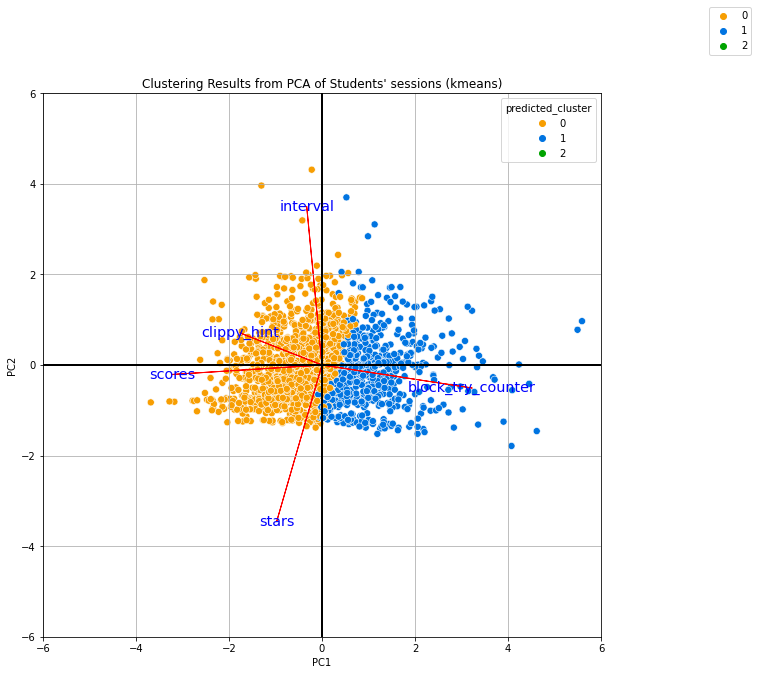

In [95]:
score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
n = coeff.shape[0]

fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette=['#F79E02','#0074E1',"#00A300"],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Clustering Results from PCA of Students' sessions (kmeans)")
fig.show()
fig.savefig("Clustering Results from PCA of Students' sessions (kmeans).png")

fig.savefig("Clustering Result from PCA of Students' sessions (kmeans).png")

### Looking for what students to indicate as needing a lower/higher level

In [96]:
scaled_students = kmeans_pipe['preprocessor']['scaler'].fit_transform(students)
scaled_students = pd.DataFrame(data=scaled_students,index=students.index, columns=students.columns)
scaled_students['predicted_cluster'] = predicted_labels
scaled_students

,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
00823529-459a-49e3-89dd-0fd3bab69d1d,-0.108367,-0.959679,0.013820,2.108327,-0.567477,0
0089f530-a8d3-4b95-be12-f28fc9387774,-0.105436,0.161897,2.015554,2.108327,-0.850811,0
00955978-dd74-4903-87b9-19d5c78f9f63,-0.106105,1.456024,0.367787,-1.104239,-0.306876,0
00dadd1d-87fe-4ed8-8d0d-acf9c529f048,-0.105739,0.291310,0.745085,0.823301,-0.416854,0
00f24922-6343-491b-943a-731d078c2250,-0.104822,1.456024,1.650464,-0.301097,-0.603053,0
...,...,...,...,...,...,...
ff362d69-ae50-4f08-970b-b025ad51b416,-0.110779,-0.269478,0.248616,1.649389,-0.156014,0
ff5fe464-0152-405b-9f6e-8a9db2ad3caf,-0.109244,-1.563605,0.074526,-1.104239,-0.631808,0
ff89169f-fec6-4a0d-8461-79c6e80f7d1d,-0.109642,-0.485166,-0.092134,-1.104239,-0.443033,0


In [97]:
print(scaled_students.mean())
scaled_students[scaled_students['predicted_cluster']==2]



interval             1.225498e-17
stars               -1.019410e-16
scores              -1.972309e-16
clippy_hint         -8.592077e-17
block_try_counter   -2.072075e-17
predicted_cluster    3.364055e-01
dtype: float64


,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
0473a4c0-5d12-48c3-8936-9ffcf5de9e5b,10.077410,-1.698410,-0.038663,0.502044,-0.335110,2
63abdea1-724c-4a70-a125-c58043d96ed9,20.617044,-1.871731,-0.202584,-0.645301,-0.322366,2
a065b9dd-8651-42f7-9071-05716d4ec26c,11.120475,-0.916542,-0.582232,-0.140469,0.138587,2
d1e25200-a7b1-4920-ba1e-9ce915c07b2e,9.308011,-0.413270,0.753006,-0.033383,-0.450892,2
f5e6f22e-26af-4a1c-931f-14bfe57ac9fe,27.132893,-0.269478,1.533336,1.037472,-0.734726,2


In [98]:
# Stars (above average = higher ; below average = lower)
high_stars = scaled_students[scaled_students['stars']>scaled_students['stars'].mean()]
low_stars = scaled_students[scaled_students['stars']<=scaled_students['stars'].mean()]

high_stars.shape, low_stars.shape

((939, 6), (797, 6))

In [99]:
# Clippy Hints (above average = higher ; below average = lower)
high_clippy_hint = scaled_students[scaled_students['clippy_hint']>scaled_students['clippy_hint'].mean()]
low_clippy_hint = scaled_students[scaled_students['clippy_hint']<=scaled_students['clippy_hint'].mean()]

high_clippy_hint.shape, low_clippy_hint.shape

((702, 6), (1034, 6))

In [100]:
number_of_sd = 0
# Interval (below average - 1 SD = higher ; above average + 1 SD = lower)
high_interval = scaled_students[scaled_students['interval']>(scaled_students['interval'].mean()+number_of_sd*(scaled_students['interval'].std()))]
low_interval = scaled_students[scaled_students['interval']<(scaled_students['interval'].mean()-number_of_sd*(scaled_students['interval'].std()))]
medium_interval = pd.concat([scaled_students, high_interval, low_interval]).drop_duplicates(keep=False, inplace=False)

high_interval.shape, low_interval.shape, medium_interval.shape

((104, 6), (1632, 6), (0, 6))

In [101]:
number_of_sd = 0
# Block Try counter (below average + 1.5 SD = higher ; above average - 1.5 SD = lower) 
high_block_try_counter = scaled_students[scaled_students['block_try_counter']>(scaled_students['block_try_counter'].mean()+(number_of_sd*scaled_students['block_try_counter'].std()))]
low_block_try_counter = scaled_students[scaled_students['block_try_counter']<(scaled_students['block_try_counter'].mean()-(number_of_sd*scaled_students['block_try_counter'].std()))]
medium_block_try_counter = pd.concat([scaled_students, high_block_try_counter, low_block_try_counter]).drop_duplicates(keep=False, inplace=False)

high_block_try_counter.shape, low_block_try_counter.shape, medium_block_try_counter.shape

((580, 6), (1156, 6), (0, 6))

In [102]:
number_of_sd = 0
# Scores (below average + 1.5 SD = higher ; above average - 1.5 SD = lower) 
high_scores = scaled_students[scaled_students['scores']>(scaled_students['scores'].mean()+(number_of_sd*scaled_students['scores'].std()))]
low_scores = scaled_students[scaled_students['scores']<(scaled_students['scores'].mean()-(number_of_sd*scaled_students['scores'].std()))]
medium_scores = pd.concat([scaled_students, high_scores, low_scores]).drop_duplicates(keep=False, inplace=False)

high_scores.shape, low_scores.shape, medium_scores.shape



((915, 6), (821, 6), (0, 6))

In [103]:
need_lower_level = low_stars.index.intersection(high_clippy_hint.index)
need_lower_level = need_lower_level.intersection(high_interval.index)
need_lower_level = need_lower_level.intersection(high_block_try_counter.index)
need_lower_level = need_lower_level.intersection(low_scores.index)

type(need_lower_level)
print(scaled_students[scaled_students.index.isin(list(need_lower_level))].shape)
scaled_students[scaled_students.index.isin(list(need_lower_level))]

(3, 6)


,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
45878788-6bd7-4bd0-a9ce-91db140738f9,0.152166,-0.398891,-0.320173,1.037472,0.087876,0
50496cf6-37ba-43cd-a864-d376f90c619c,3.246430,-1.261642,-0.808914,0.180788,0.993997,1
fc0c4fb1-da60-4af0-bc21-1122e85ba263,2.834241,-0.115415,-0.455152,0.180788,0.549706,1


In [104]:
need_higher_level = high_stars.index.intersection(low_clippy_hint.index)
need_higher_level = need_higher_level.intersection(low_interval.index)
need_higher_level = need_higher_level.intersection(low_block_try_counter.index)
need_higher_level = need_higher_level.intersection(high_scores.index)

type(need_higher_level)
print(scaled_students[scaled_students.index.isin(list(need_higher_level))].shape)
scaled_students[scaled_students.index.isin(list(need_higher_level))]

(200, 6)


,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
00955978-dd74-4903-87b9-19d5c78f9f63,-0.106105,1.456024,0.367787,-1.104239,-0.306876,0
00f24922-6343-491b-943a-731d078c2250,-0.104822,1.456024,1.650464,-0.301097,-0.603053,0
02d90e10-a2cc-4233-9414-eece72318fac,-0.105565,0.938374,0.056740,-1.104239,-0.363999,0
03ab4dc3-0a80-4531-b4f7-bd41a2972e1f,-0.110132,0.122682,0.007715,-0.520136,-0.003570,0
04ace0b3-7076-4975-8599-021196401e43,-0.105457,0.000132,1.484527,-1.104239,-0.758483,0
...,...,...,...,...,...,...
fc6a2129-fd42-4edb-a466-5708daccdfb9,-0.097416,0.970727,0.208596,-0.301097,-0.539598,0
fc895075-dea0-48cb-8211-10a32cbef71c,-0.107534,1.456024,1.339420,-1.104239,-0.772900,0
fceff6ca-473c-4f08-bc33-b09d5ce6227f,-0.110636,0.233793,0.102080,-0.747287,-0.153806,0


In [105]:
print("Need higher level:",scaled_students[scaled_students.index.isin(list(need_higher_level))]['predicted_cluster'].value_counts())
print("Need lower level:",scaled_students[scaled_students.index.isin(list(need_lower_level))]['predicted_cluster'].value_counts())




Need higher level: 0    200
Name: predicted_cluster, dtype: int64
Need lower level: 1    2
0    1
Name: predicted_cluster, dtype: int64


# Agglomerative Clustering


In [106]:
# Imports
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

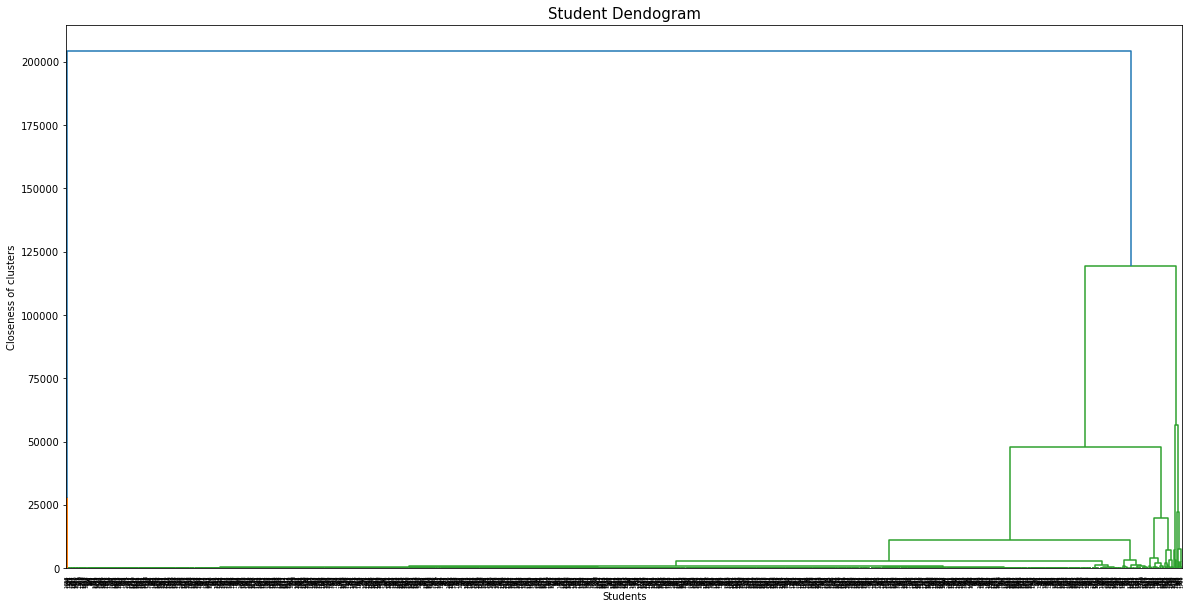

In [107]:
# Creating the Dendogram from all the students
plt.figure(figsize=(20, 10))
plt.title("Student Dendogram", fontsize=15)
plt.ylabel("Closeness of clusters")
plt.xlabel("Students")
dend = shc.dendrogram(shc.linkage(students, method='ward'))
plt.savefig('dendogram.png')

In [108]:
# Preprocessing Part of the pipeline:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

# Clustering Part of the pipeline:
agglomerative_clustering = Pipeline(
   [
       (
           "agglomerative_clustering",
           AgglomerativeClustering(
               n_clusters=2,
               affinity = 'euclidean'
           ),
       ),
   ]
)

# Assembling the pipeline:
agglomerative_clustering_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", agglomerative_clustering)
    ]
)

#fitting the Pipeline to the data:
agglomerative_clustering_pipe.fit(students)

preprocessed_data = agglomerative_clustering_pipe["preprocessor"].transform(students)
predicted_labels = agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].labels_
print(agglomerative_clustering_pipe['clusterer']['agglomerative_clustering'].n_clusters, 
      'clusters and',
      agglomerative_clustering_pipe['preprocessor']['pca'].n_components,
      'pca components; give silhouette score of:',
      silhouette_score(preprocessed_data, predicted_labels))

2 clusters and 2 pca components; give silhouette score of: 0.265777174666151


In [109]:
components = [2,3,4,5]
clusters = [i for i in range(2,9)]

agglomerative_clustering_silhouette_scores = {}

for n_components in components:
    for n_clusters in clusters:
        
        agglomerative_clustering_pipe['preprocessor']['pca'].n_components = n_components
        agglomerative_clustering_pipe['clusterer']['agglomerative_clustering'].n_clusters = n_clusters
        
        agglomerative_clustering_pipe.fit(students)

        preprocessed_data = agglomerative_clustering_pipe["preprocessor"].transform(students)
        predicted_labels = agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].labels_
        
        agglomerative_clustering_silhouette_scores['{}components{}clusters'.format(agglomerative_clustering_pipe['preprocessor']['pca'].n_components, agglomerative_clustering_pipe['clusterer']['agglomerative_clustering'].n_clusters)] = silhouette_score(preprocessed_data, predicted_labels)

agglomerative_clustering_silhouette_scores = sort_dict_on_keys(agglomerative_clustering_silhouette_scores)     
print('highest silhouette_score for agglomerative_clustering:',agglomerative_clustering_silhouette_scores[0])

highest silhouette_score for agglomerative_clustering: ('5components2clusters', 0.889546720337076)


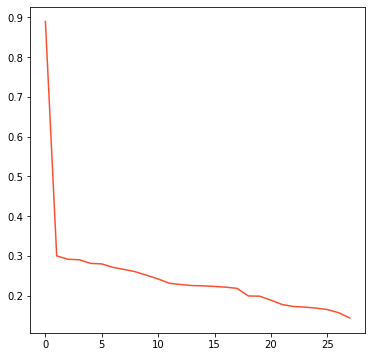

In [110]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(len(agglomerative_clustering_silhouette_scores)),
    [score[1] for score in agglomerative_clustering_silhouette_scores],
    c="#fc4f30",
    label="agglomerative_clustering",
)

In [111]:
agglomerative_clustering_silhouette_scores

[('5components2clusters', 0.889546720337076),
 ('2components5clusters', 0.2999889363947199),
 ('2components8clusters', 0.2914628207810109),
 ('2components7clusters', 0.29027989352883277),
 ('2components6clusters', 0.2811588874398215),
 ('2components3clusters', 0.2797608916608898),
 ('2components4clusters', 0.2711084026334293),
 ('2components2clusters', 0.265777174666151),
 ('3components3clusters', 0.25983517341109197),
 ('3components2clusters', 0.2511389689022261),
 ('4components3clusters', 0.2418005892878595),
 ('3components4clusters', 0.23111187219457135),
 ('4components2clusters', 0.2279159919794187),
 ('3components5clusters', 0.22528907023750178),
 ('4components6clusters', 0.22455832469159615),
 ('4components5clusters', 0.22312122966330303),
 ('3components6clusters', 0.22122618203388653),
 ('4components4clusters', 0.21822788719379346),
 ('4components7clusters', 0.19908142750118482),
 ('3components7clusters', 0.19859989683103593),
 ('3components8clusters', 0.18863580100808305),
 ('4

## Best result for agglomerative_clustering:

In [112]:
# fit pipeline with best parameters (as found in silhouettescore)
agglomerative_clustering_pipe["preprocessor"]["pca"].n_components = 5
agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].n_clusters = 2

agglomerative_clustering_pipe.fit(students)

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    agglomerative_clustering_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2","component_3", "component_4", "component_5"],
)


# make the original values scaled between -1 and 1
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

# define preprocessed data and labels
preprocessed_data = agglomerative_clustering_pipe["preprocessor"].transform(students)
predicted_labels = list(agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].labels_)

# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = list(agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].labels_)
                                  
pcamodel = agglomerative_clustering_pipe["preprocessor"]['pca']
pcamodel.n_components = 2
pca = pcamodel.fit_transform(x)
pca.shape

(1736, 2)

### What are the means and SD's within the clusters?

In [113]:
x["predicted_cluster"] = list(agglomerative_clustering_pipe["clusterer"]["agglomerative_clustering"].labels_)
agglomerative_clustering_clustermeans = x.groupby(by=["predicted_cluster"]).mean().add_suffix("_mean").transpose()
agglomerative_clustering_clustermeans

agglomerative_clustering_clusterstd = x.groupby(by=["predicted_cluster"]).std().add_suffix("_std").transpose()
agglomerative_clustering_clusterstd

agglomerative_clustering_clusters = pd.concat([agglomerative_clustering_clustermeans, agglomerative_clustering_clusterstd]).sort_index().round(decimals=4)
print(tabulate(agglomerative_clustering_clusters, headers='keys', tablefmt='fancy_grid'))
# print(tabulate(agglomerative_clustering_clusters, headers='keys', tablefmt='latex'))

╒════════════════════════╤═════════╤═════════╕
│                        │       0 │       1 │
╞════════════════════════╪═════════╪═════════╡
│ block_try_counter_mean │  0.0006 │ -0.5285 │
├────────────────────────┼─────────┼─────────┤
│ block_try_counter_std  │  1.0007 │  0.2916 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_mean       │ -0.0002 │  0.1961 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_std        │  1.0004 │  1.1899 │
├────────────────────────┼─────────┼─────────┤
│ interval_mean          │ -0.0275 │ 23.875  │
├────────────────────────┼─────────┼─────────┤
│ interval_std           │  0.5752 │  4.6074 │
├────────────────────────┼─────────┼─────────┤
│ scores_mean            │ -0.0008 │  0.6654 │
├────────────────────────┼─────────┼─────────┤
│ scores_std             │  1.0002 │  1.2275 │
├────────────────────────┼─────────┼─────────┤
│ stars_mean             │  0.0012 │ -1.0706 │
├────────────────────────┼─────────┼─────────┤
│ stars_std  

In [114]:
x['predicted_cluster'].value_counts()

0    1734
1       2
Name: predicted_cluster, dtype: int64

### Visualizing Clusters and the values on which they are based:

C:\Users\Joost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joost\AppData\Local\Temp/ipykernel_17788/2474173217.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


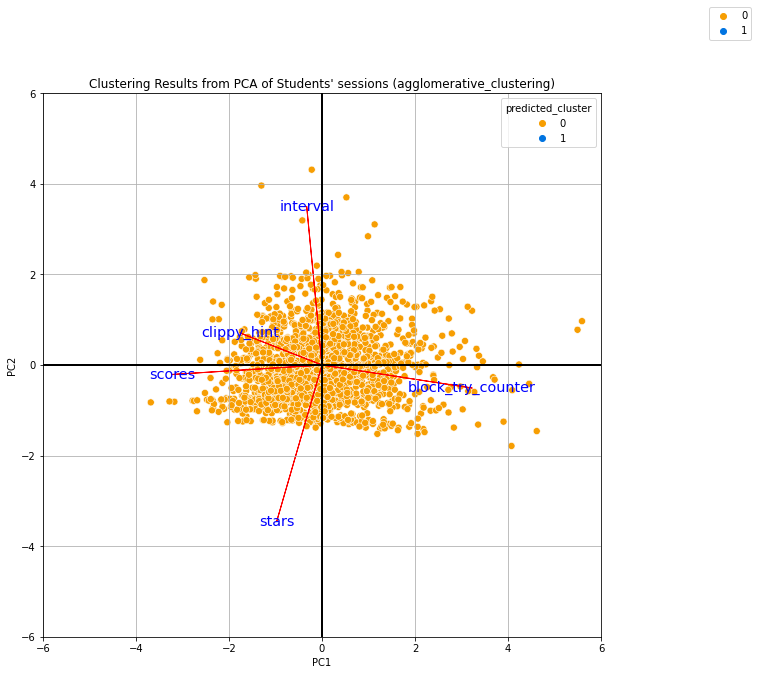

In [115]:
score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
n = coeff.shape[0]

fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette=['#F79E02','#0074E1'],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Clustering Results from PCA of Students' sessions (agglomerative_clustering)")
fig.show()
fig.savefig("Clustering Results from PCA of Students' sessions (agglomerative_clustering).png")

# Fuzzy C-Means

In [119]:
# !pip install fuzzy-c-means

In [120]:
from fcmeans import FCM

In [121]:
students

,interval,stars,scores,clippy_hint,block_try_counter
student_id,,,,,
00823529-459a-49e3-89dd-0fd3bab69d1d,30.836879,1.133333,0.627456,1.000000,1.606579
0089f530-a8d3-4b95-be12-f28fc9387774,43.382353,2.000000,0.859694,1.000000,1.088235
00955978-dd74-4903-87b9-19d5c78f9f63,40.517628,3.000000,0.668523,0.000000,2.083333
00dadd1d-87fe-4ed8-8d0d-acf9c529f048,42.083916,2.100000,0.712296,0.600000,1.882135
00f24922-6343-491b-943a-731d078c2250,46.008536,3.000000,0.817337,0.250000,1.541495
...,...,...,...,...,...
ff362d69-ae50-4f08-970b-b025ad51b416,20.514477,1.666667,0.654697,0.857143,2.359328
ff5fe464-0152-405b-9f6e-8a9db2ad3caf,27.085185,0.666667,0.634499,0.000000,1.488889
ff89169f-fec6-4a0d-8461-79c6e80f7d1d,25.382418,1.500000,0.615163,0.000000,1.834242


In [122]:
# Preprocessing Part of the pipeline:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)


# Assembling the pipeline:
FCM_pipe = Pipeline(
    [
        ("preprocessor", preprocessor)
    ]
)

def FCM_pipe2(n_clusters=2, n_components=2):
    FCM_pipe['preprocessor']['pca'].n_components = n_components
    
    FCM_pipe.fit(students)
    
    preprocessed_data = FCM_pipe["preprocessor"].transform(students)

    fcm = FCM(n_clusters=n_clusters)
    
    fcm.fit(preprocessed_data)

    predicted_labels = fcm.predict(preprocessed_data)

    
    
#     print(n_clusters,
#       'clusters and',
#       FCM_pipe['preprocessor']['pca'].n_components,
#       'pca components; give silhouette score of:',
#       silhouette_score(preprocessed_data, predicted_labels))
    return silhouette_score(preprocessed_data, predicted_labels)

FCM_pipe2(2,2)

print(2,
  'clusters and',
  2,
  'pca components; give silhouette score of:',
  FCM_pipe2(2,2))

2 clusters and 2 pca components; give silhouette score of: 0.357493444833745


In [123]:
components = [2,3,4,5]
clusters = [i for i in range(2,9)]

FCM_silhouette_scores = {}

for n_components in components:
    for n_clusters in clusters:
        FCM_silhouette_scores['{}components{}clusters'.format(n_components, n_clusters)] = FCM_pipe2(n_clusters, n_components)
        
FCM_silhouette_scores = sort_dict_on_keys(FCM_silhouette_scores)     
print('highest silhouette_score for FCM:',FCM_silhouette_scores[0])

highest silhouette_score for FCM: ('2components2clusters', 0.357493444833745)


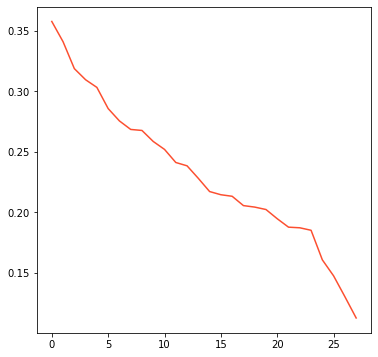

In [124]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(len(FCM_silhouette_scores)),
    [score[1] for score in FCM_silhouette_scores],
    c="#fc4f30",
    label="EM",
)

In [125]:
FCM_silhouette_scores

[('2components2clusters', 0.357493444833745),
 ('2components3clusters', 0.34074659803137236),
 ('2components4clusters', 0.318531607293977),
 ('2components5clusters', 0.3093342879328097),
 ('2components6clusters', 0.3030177321460616),
 ('3components3clusters', 0.28553064968224673),
 ('2components7clusters', 0.2753221639218931),
 ('2components8clusters', 0.26829642263755205),
 ('3components2clusters', 0.26745104410390874),
 ('3components5clusters', 0.258343408027999),
 ('3components4clusters', 0.25179743505560304),
 ('3components6clusters', 0.24099248052387762),
 ('4components4clusters', 0.23823198296447895),
 ('4components3clusters', 0.22787180961556666),
 ('4components5clusters', 0.21698102945150272),
 ('4components2clusters', 0.21434753457459207),
 ('3components7clusters', 0.21307657546221206),
 ('4components8clusters', 0.20537614575857882),
 ('4components7clusters', 0.2041449905457341),
 ('4components6clusters', 0.2021399505529014),
 ('5components3clusters', 0.19452084740481665),
 ('

## Best result for FCM:

In [126]:
# fit pipeline with best parameters (as found in silhouettescore)
n_clusters=2 
n_components=2

FCM_pipe['preprocessor']['pca'].n_components = n_components   
FCM_pipe.fit(students)   


preprocessed_data = FCM_pipe["preprocessor"].transform(students)
fcm = FCM(n_clusters=n_clusters)
fcm.fit(preprocessed_data)



# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = predicted_labels

# make the original values scaled between -1 and 1
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

# define preprocessed data and labels
# preprocessed_data is already defined in line 9 of this cell
predicted_labels = fcm.predict(preprocessed_data)

# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = list(predicted_labels)
                                  
pcamodel = FCM_pipe['preprocessor']['pca']
pcamodel.n_components = 2
pca = pcamodel.fit_transform(x)
pca.shape

(1736, 2)

### What are the means and SD's within the clusters?

In [127]:
x["predicted_cluster"] = list(predicted_labels)
fcm_clustermeans = x.groupby(by=["predicted_cluster"]).mean().add_suffix("_mean").transpose()
fcm_clustermeans

fcm_clusterstd = x.groupby(by=["predicted_cluster"]).std().add_suffix("_std").transpose()
fcm_clusterstd

fcm_clusters = pd.concat([fcm_clustermeans, fcm_clusterstd]).sort_index().round(decimals=4)
print(tabulate(fcm_clusters, headers='keys', tablefmt='fancy_grid'))
# print(tabulate(fcm_clusters, headers='keys', tablefmt='latex'))

╒════════════════════════╤═════════╤═════════╕
│                        │       0 │       1 │
╞════════════════════════╪═════════╪═════════╡
│ block_try_counter_mean │  0.5285 │ -0.4106 │
├────────────────────────┼─────────┼─────────┤
│ block_try_counter_std  │  1.2626 │  0.3933 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_mean       │ -0.3782 │  0.2938 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_std        │  0.8002 │  1.041  │
├────────────────────────┼─────────┼─────────┤
│ interval_mean          │  0.0198 │ -0.0154 │
├────────────────────────┼─────────┼─────────┤
│ interval_std           │  1.0257 │  0.9803 │
├────────────────────────┼─────────┼─────────┤
│ scores_mean            │ -0.7187 │  0.5583 │
├────────────────────────┼─────────┼─────────┤
│ scores_std             │  0.8633 │  0.6973 │
├────────────────────────┼─────────┼─────────┤
│ stars_mean             │ -0.2547 │  0.1979 │
├────────────────────────┼─────────┼─────────┤
│ stars_std  

### Visualizing Clusters and the values on which they are based:

C:\Users\Joost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joost\AppData\Local\Temp/ipykernel_17788/2313872979.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


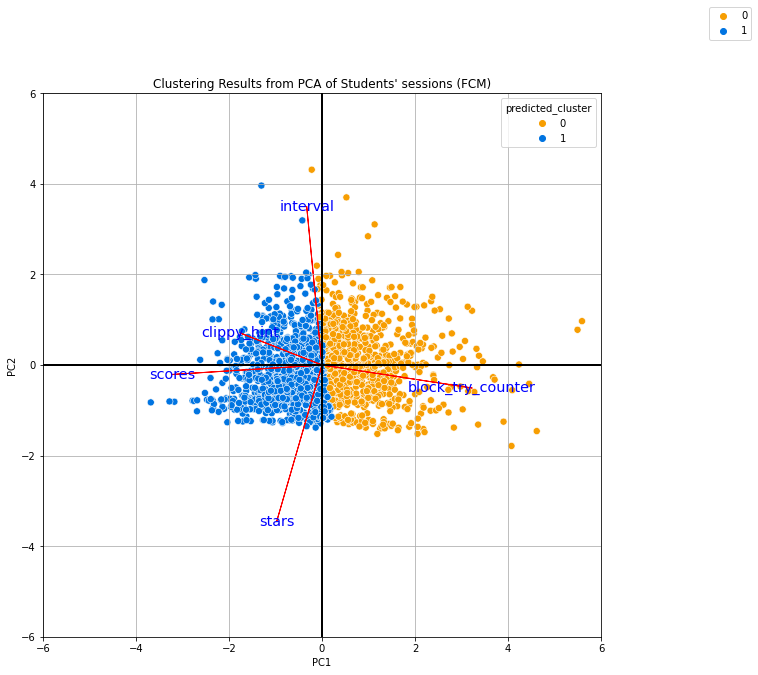

In [128]:
score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
n = coeff.shape[0]

fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette=['#F79E02','#0074E1'],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Clustering Results from PCA of Students' sessions (FCM)")
fig.show()
fig.savefig("Clustering Results from PCA of Students' sessions (FCM).png")

# Expectation Maximization (EM)
https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137

EM is an iterative algorithm to find the maximum likelihood when there are latent variables. The algorithm iterates between performing an expectation (E) step, which creates a heuristic of the posterior distribution and the log-likelihood using the current estimate for the parameters, and a maximization (M) step, which computes parameters by maximizing the expected log-likelihood from the E step. The parameter-estimates from M step are then used in the next E step. In the following sections, we will delve into the math behind EM, and implement it in Python from scratch.

In [129]:
# imports
from sklearn.mixture import GaussianMixture

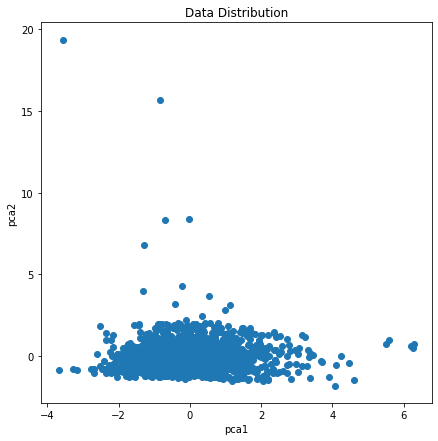

In [130]:
try:
    students.drop('primm_hint',axis=1 ,inplace=True)
except KeyError:
    pass

plt.figure(figsize=(7,7))
plt.scatter(pcadf['component_1'],pcadf['component_2'])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('Data Distribution')
plt.show()


    

In [131]:
# Preprocessing Part of the pipeline:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

# Clustering Part of the pipeline:
EM = Pipeline(
   [
       (
           "EM",
           GaussianMixture(n_components = 2,
                          random_state=42)
           ),
   ]
)

# Assembling the pipeline:
EM_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", EM)
    ]
)

#fitting the Pipeline to the data:
EM_pipe.fit(students)

preprocessed_data = EM_pipe["preprocessor"].transform(students)
predicted_labels = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))
print(EM_pipe['clusterer']['EM'].n_components,
      'clusters and',
      EM_pipe['preprocessor']['pca'].n_components,
      'pca components; give silhouette score of:',
      silhouette_score(preprocessed_data, predicted_labels))

2 clusters and 2 pca components; give silhouette score of: 0.7742828460713749


In [132]:
components = [2,3,4,5]
clusters = [i for i in range(2,9)]

EM_silhouette_scores = {}

for n_components in components:
    for n_clusters in clusters:
        
        EM_pipe['preprocessor']['pca'].n_components = n_components
        EM_pipe['clusterer']['EM'].n_components = n_clusters
        
        EM_pipe.fit(students)

        preprocessed_data = EM_pipe["preprocessor"].transform(students)
        predicted_labels = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))
        
#         print("{} clusters and {} components give silhouette score of:{}".format(EM_pipe['clusterer']['EM'].n_components, 
#                                                                                  EM_pipe['preprocessor']['pca'].n_components,
#                                                                                  silhouette_score(preprocessed_data, predicted_labels)))
        EM_silhouette_scores['{}components{}clusters'.format(EM_pipe['preprocessor']['pca'].n_components, EM_pipe['clusterer']['EM'].n_components)] = silhouette_score(preprocessed_data, predicted_labels)
#         print('clusters:'EM_pipe['clusterer']['EM'].n_components,'and' 'clusters give silhouette score of:',silhouette_score(preprocessed_data, predicted_labels))
EM_silhouette_scores = sort_dict_on_keys(EM_silhouette_scores)     
print('highest silhouette_score for EM:',EM_silhouette_scores[0])

highest silhouette_score for EM: ('2components2clusters', 0.7742828460713749)


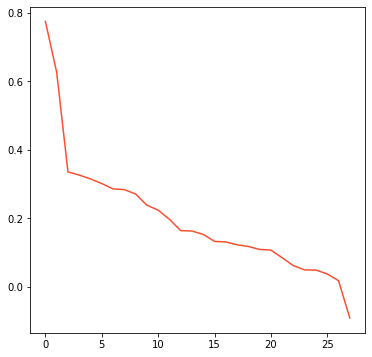

In [133]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(len(EM_silhouette_scores)),
    [score[1] for score in EM_silhouette_scores],
    c="#fc4f30",
    label="EM",
)

In [134]:
EM_silhouette_scores

[('2components2clusters', 0.7742828460713749),
 ('3components2clusters', 0.6257627742029845),
 ('2components3clusters', 0.33512490854756083),
 ('2components4clusters', 0.3259498229894766),
 ('2components6clusters', 0.31470548125497677),
 ('2components7clusters', 0.3011968531395414),
 ('4components2clusters', 0.28557776216754893),
 ('2components8clusters', 0.2835043916031451),
 ('2components5clusters', 0.2707932187245185),
 ('3components4clusters', 0.23811087252691215),
 ('3components3clusters', 0.22357638634882984),
 ('3components5clusters', 0.19690597831724052),
 ('4components3clusters', 0.16391399098665377),
 ('5components4clusters', 0.1626576809348991),
 ('5components3clusters', 0.1527443317787509),
 ('5components6clusters', 0.13244739145914444),
 ('5components2clusters', 0.13073031130988763),
 ('5components5clusters', 0.12244189243811923),
 ('4components7clusters', 0.11762664907388976),
 ('3components7clusters', 0.1089475535644216),
 ('4components4clusters', 0.10704306678690567),
 

C:\Users\Joost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joost\AppData\Local\Temp/ipykernel_17788/897582150.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


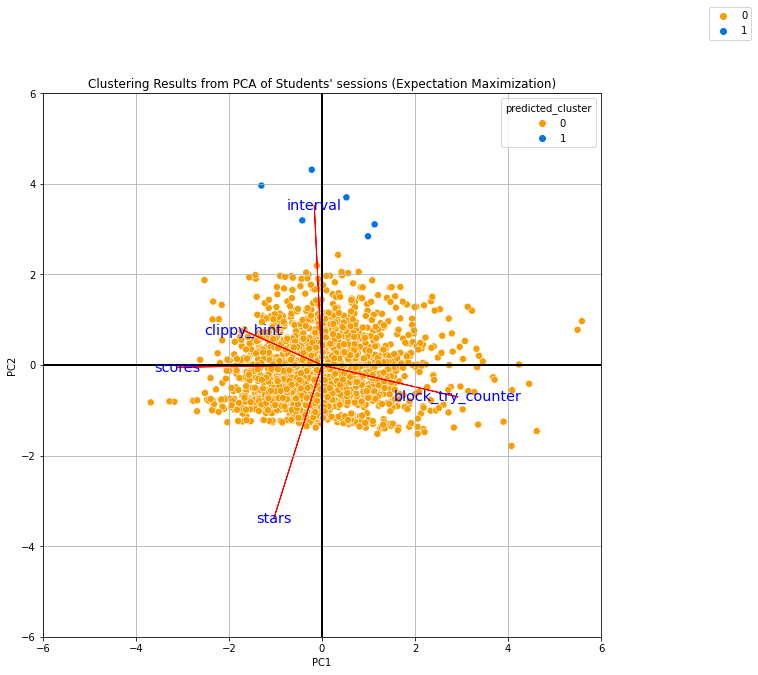

In [135]:
#Best result but is not usable
# fit pipeline with best parameters (as found in silhouettescore)
EM_pipe["preprocessor"]["pca"].n_components = 2
EM_pipe["clusterer"]["EM"].n_components = 2

EM_pipe.fit(students)

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    EM_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2"]#, "component_4"],
)

# define preprocessed data and labels
preprocessed_data = EM_pipe["preprocessor"].transform(students)
predicted_labels = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))

# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))

pcamodel = EM_pipe["preprocessor"]['pca']
pcamodel.n_components = 4
pca = pcamodel.fit_transform(x)
pca.shape

x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette=['#F79E02','#0074E1'],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Clustering Results from PCA of Students' sessions (Expectation Maximization)")
fig.show()
fig.savefig("Semi Clustering Results from PCA of Students' sessions (Expectation Maximiaztion).png")

## Best result for EM:

In [136]:
# fit pipeline with best parameters (as found in silhouettescore)
EM_pipe["preprocessor"]["pca"].n_components = 3
EM_pipe["clusterer"]["EM"].n_components = 2

EM_pipe.fit(students)

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    EM_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2", "component_3"]#, "component_4"],
)

# define preprocessed data and labels
preprocessed_data = EM_pipe["preprocessor"].transform(students)
predicted_labels = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))

# fill PCA dataframe with predictions
pcadf["predicted_cluster"] = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))

pcamodel = EM_pipe["preprocessor"]['pca']
pcamodel.n_components = 4
pca = pcamodel.fit_transform(x)
pca.shape

(1736, 4)

### What are the means and SD's within the clusters?

In [137]:
list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data)).count(1), list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data)).count(0)


(1698, 38)

In [138]:
x["predicted_cluster"] = list(EM_pipe["clusterer"]["EM"].predict(preprocessed_data))
EM_clustermeans = x.groupby(by=["predicted_cluster"]).mean().add_suffix("_mean").transpose()
EM_clustermeans

EM_clusterstd = x.groupby(by=["predicted_cluster"]).std().add_suffix("_std").transpose()
EM_clusterstd

EM_clusters = pd.concat([EM_clustermeans, EM_clusterstd]).sort_index().round(decimals=4)
print(tabulate(EM_clusters, headers='keys', tablefmt='fancy_grid'))
# print(tabulate(EM_clusters, headers='keys', tablefmt='latex'))

╒════════════════════════╤═════════╤═════════╕
│                        │       0 │       1 │
╞════════════════════════╪═════════╪═════════╡
│ block_try_counter_mean │  2.2693 │ -0.0508 │
├────────────────────────┼─────────┼─────────┤
│ block_try_counter_std  │  3.2247 │  0.8236 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_mean       │  0.0744 │ -0.0017 │
├────────────────────────┼─────────┼─────────┤
│ clippy_hint_std        │  1.2288 │  0.995  │
├────────────────────────┼─────────┼─────────┤
│ interval_mean          │  3.5114 │ -0.0786 │
├────────────────────────┼─────────┼─────────┤
│ interval_std           │  5.7316 │  0.1564 │
├────────────────────────┼─────────┼─────────┤
│ scores_mean            │ -0.2907 │  0.0065 │
├────────────────────────┼─────────┼─────────┤
│ scores_std             │  1.0108 │  0.9994 │
├────────────────────────┼─────────┼─────────┤
│ stars_mean             │ -0.4163 │  0.0093 │
├────────────────────────┼─────────┼─────────┤
│ stars_std  

# Cluster 1 seems to have:
     * Less needed block tries
     * less clippy hints
     * less interval
     * higher scores
     * more stars
     
I could consider cluster 1 as the large mass. Students in cluster 0 need a lower level. The way to identify students who need a higher level seems to be by rule based decision making where the students who are at all metrics in the model above average (or some arbitrary number) are identified as needing a higher level.

### Visualizing Clusters and the values on which they are based:

C:\Users\Joost\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joost\AppData\Local\Temp/ipykernel_17788/404911726.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


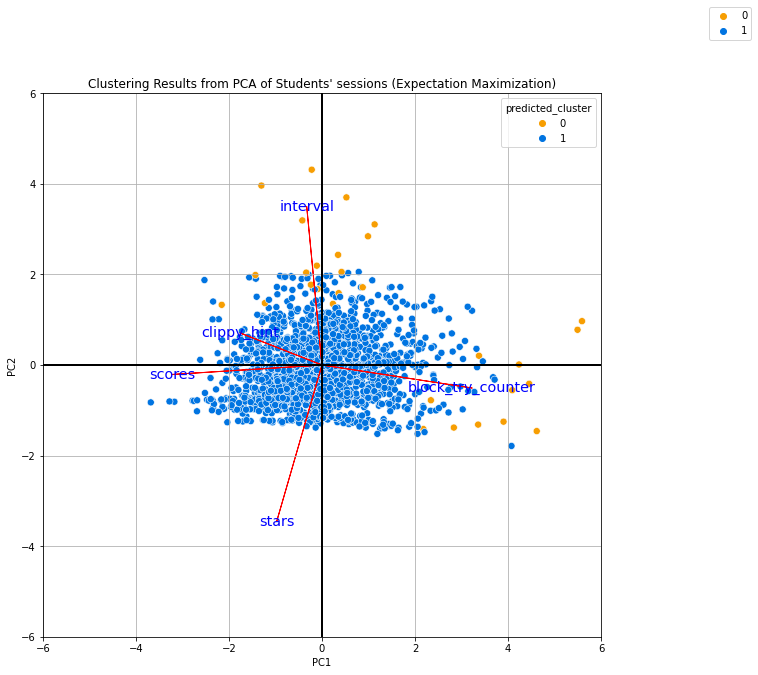

In [139]:
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    palette=['#F79E02','#0074E1'],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Clustering Results from PCA of Students' sessions (Expectation Maximization)")
fig.show()
fig.savefig("Clustering Results from PCA of Students' sessions (Expectation Maximiaztion).png")

In [140]:
# Stars (above average = higher ; below average = lower)
high_stars = scaled_students[scaled_students['stars']>scaled_students['stars'].mean()]
low_stars = scaled_students[scaled_students['stars']<=scaled_students['stars'].mean()]

high_stars.shape, low_stars.shape

((939, 6), (797, 6))

In [141]:
# Clippy Hints (above average = higher ; below average = lower)
high_clippy_hint = scaled_students[scaled_students['clippy_hint']>scaled_students['clippy_hint'].mean()]
low_clippy_hint = scaled_students[scaled_students['clippy_hint']<=scaled_students['clippy_hint'].mean()]

high_clippy_hint.shape, low_clippy_hint.shape

((702, 6), (1034, 6))

In [142]:
number_of_sd = 0
# Interval (below average - 1 SD = higher ; above average + 1 SD = lower)
high_interval = scaled_students[scaled_students['interval']>(scaled_students['interval'].mean()+number_of_sd*(scaled_students['interval'].std()))]
low_interval = scaled_students[scaled_students['interval']<(scaled_students['interval'].mean()-number_of_sd*(scaled_students['interval'].std()))]
medium_interval = pd.concat([scaled_students, high_interval, low_interval]).drop_duplicates(keep=False, inplace=False)

high_interval.shape, low_interval.shape, medium_interval.shape

((104, 6), (1632, 6), (0, 6))

In [143]:
number_of_sd = 0
# Block Try counter (below average + 1.5 SD = higher ; above average - 1.5 SD = lower) 
high_block_try_counter = scaled_students[scaled_students['block_try_counter']>(scaled_students['block_try_counter'].mean()+(number_of_sd*scaled_students['block_try_counter'].std()))]
low_block_try_counter = scaled_students[scaled_students['block_try_counter']<(scaled_students['block_try_counter'].mean()-(number_of_sd*scaled_students['block_try_counter'].std()))]
medium_block_try_counter = pd.concat([scaled_students, high_block_try_counter, low_block_try_counter]).drop_duplicates(keep=False, inplace=False)

high_block_try_counter.shape, low_block_try_counter.shape, medium_block_try_counter.shape

((580, 6), (1156, 6), (0, 6))

In [144]:
number_of_sd = 0
# Scores (below average + 1.5 SD = higher ; above average - 1.5 SD = lower) 
high_scores = scaled_students[scaled_students['scores']>(scaled_students['scores'].mean()+(number_of_sd*scaled_students['scores'].std()))]
low_scores = scaled_students[scaled_students['scores']<(scaled_students['scores'].mean()-(number_of_sd*scaled_students['scores'].std()))]
medium_scores = pd.concat([scaled_students, high_scores, low_scores]).drop_duplicates(keep=False, inplace=False)

high_scores.shape, low_scores.shape, medium_scores.shape



((915, 6), (821, 6), (0, 6))

In [145]:
need_lower_level = low_stars.index.intersection(high_clippy_hint.index)
need_lower_level = need_lower_level.intersection(high_interval.index)
need_lower_level = need_lower_level.intersection(high_block_try_counter.index)
need_lower_level = need_lower_level.intersection(low_scores.index)

type(need_lower_level)
print(scaled_students[scaled_students.index.isin(list(need_lower_level))].shape)
scaled_students[scaled_students.index.isin(list(need_lower_level))]

(3, 6)


,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
45878788-6bd7-4bd0-a9ce-91db140738f9,0.152166,-0.398891,-0.320173,1.037472,0.087876,0
50496cf6-37ba-43cd-a864-d376f90c619c,3.246430,-1.261642,-0.808914,0.180788,0.993997,1
fc0c4fb1-da60-4af0-bc21-1122e85ba263,2.834241,-0.115415,-0.455152,0.180788,0.549706,1


In [146]:
need_higher_level = high_stars.index.intersection(low_clippy_hint.index)
need_higher_level = need_higher_level.intersection(low_interval.index)
need_higher_level = need_higher_level.intersection(low_block_try_counter.index)
need_higher_level = need_higher_level.intersection(high_scores.index)

type(need_higher_level)
print(scaled_students[scaled_students.index.isin(list(need_higher_level))].shape)
scaled_students[scaled_students.index.isin(list(need_higher_level))]

(200, 6)


,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
00955978-dd74-4903-87b9-19d5c78f9f63,-0.106105,1.456024,0.367787,-1.104239,-0.306876,0
00f24922-6343-491b-943a-731d078c2250,-0.104822,1.456024,1.650464,-0.301097,-0.603053,0
02d90e10-a2cc-4233-9414-eece72318fac,-0.105565,0.938374,0.056740,-1.104239,-0.363999,0
03ab4dc3-0a80-4531-b4f7-bd41a2972e1f,-0.110132,0.122682,0.007715,-0.520136,-0.003570,0
04ace0b3-7076-4975-8599-021196401e43,-0.105457,0.000132,1.484527,-1.104239,-0.758483,0
...,...,...,...,...,...,...
fc6a2129-fd42-4edb-a466-5708daccdfb9,-0.097416,0.970727,0.208596,-0.301097,-0.539598,0
fc895075-dea0-48cb-8211-10a32cbef71c,-0.107534,1.456024,1.339420,-1.104239,-0.772900,0
fceff6ca-473c-4f08-bc33-b09d5ce6227f,-0.110636,0.233793,0.102080,-0.747287,-0.153806,0


In [147]:
print("Need higher level:",scaled_students[scaled_students.index.isin(list(need_higher_level))]['predicted_cluster'].value_counts())
print("Need lower level:",scaled_students[scaled_students.index.isin(list(need_lower_level))]['predicted_cluster'].value_counts())




Need higher level: 0    200
Name: predicted_cluster, dtype: int64
Need lower level: 1    2
0    1
Name: predicted_cluster, dtype: int64


In [148]:
scaled_students = kmeans_pipe['preprocessor']['scaler'].fit_transform(students)
scaled_students = pd.DataFrame(data=scaled_students,index=students.index, columns=students.columns)
scaled_students['predicted_cluster'] = predicted_labels
scaled_students

,interval,stars,scores,clippy_hint,block_try_counter,predicted_cluster
student_id,,,,,,
00823529-459a-49e3-89dd-0fd3bab69d1d,-0.108367,-0.959679,0.013820,2.108327,-0.567477,1
0089f530-a8d3-4b95-be12-f28fc9387774,-0.105436,0.161897,2.015554,2.108327,-0.850811,1
00955978-dd74-4903-87b9-19d5c78f9f63,-0.106105,1.456024,0.367787,-1.104239,-0.306876,1
00dadd1d-87fe-4ed8-8d0d-acf9c529f048,-0.105739,0.291310,0.745085,0.823301,-0.416854,1
00f24922-6343-491b-943a-731d078c2250,-0.104822,1.456024,1.650464,-0.301097,-0.603053,1
...,...,...,...,...,...,...
ff362d69-ae50-4f08-970b-b025ad51b416,-0.110779,-0.269478,0.248616,1.649389,-0.156014,1
ff5fe464-0152-405b-9f6e-8a9db2ad3caf,-0.109244,-1.563605,0.074526,-1.104239,-0.631808,1
ff89169f-fec6-4a0d-8461-79c6e80f7d1d,-0.109642,-0.485166,-0.092134,-1.104239,-0.443033,1


In [149]:
print(scaled_students['predicted_cluster'].value_counts())

1    1698
0      38
Name: predicted_cluster, dtype: int64


# Markov clustering

In [150]:
# Imports
import markov_clustering as mc
import networkx as nx
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import random
import functions as fx

In [151]:
students = fx.csv_to_df('students_averaged.csv')

students.set_index('student_id',inplace=True)
students.drop('primm_hint',axis=1 ,inplace=True)

# Preprocessing Part of the pipeline:
preprocessor = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)


# Assembling the pipeline:
markov_pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
    ]
)

#fitting the Pipeline to the data:
markov_pipe.fit(students)

# Initialize PCA dataframe
pcadf = pd.DataFrame(
    markov_pipe["preprocessor"].transform(students),
    columns=["component_1", "component_2"],
)

# generate positions as a dictionary where the key is the node id and the value
# is a tuple containing 2D coordinates
positions = {i:(pcadf.iloc[i][0],pcadf.iloc[i][1]) for i in range(pcadf.shape[0])}

# use networkx to generate the graph
network = nx.random_geometric_graph(pcadf.shape[0], 0.3, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(network)

#### Gridsearch shows that Markov Clustering works best (highest modularity) with 2.2 as inflation and 2 as Expansion



In [152]:
with open('results_markov_gridsearch.txt') as f:
    lines = f.readlines()


find_markov_parameters = {float(lines[i][40:-2]):lines[i][:-32] for i in range(0,len(lines))}
best_parameters = sorted(find_markov_parameters.keys(), reverse=True)[0]
find_markov_parameters[best_parameters], best_parameters


('inflation: 2.2 expansion: 2 ', 0.8899840578169984)

In [153]:
inflation = 2.2
expansion = 2

result = mc.run_mcl(matrix, inflation=inflation, expansion=expansion)
clusters = mc.get_clusters(result)
Q = mc.modularity(matrix=result, clusters=clusters)

# Calculate_silhouette_scores:
preprocessed_data = []
predicted_labels = []

for cluster in clusters:
    for point in cluster:
        preprocessed_data.append(positions[point])
        predicted_labels.append(clusters.index(cluster))


In [154]:
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

x["predicted_cluster"] = predicted_labels
markov_clustermeans = x.groupby(by=["predicted_cluster"]).mean().add_suffix("_mean").transpose()
markov_clustermeans

markov_clusterstd = x.groupby(by=["predicted_cluster"]).std().add_suffix("_std").transpose()
markov_clusterstd

markov_clusters = pd.concat([markov_clustermeans, markov_clusterstd]).sort_index().round(decimals=4)
# print(tabulate(markov_clusters, headers='keys', tablefmt='fancy_grid'))
# print(tabulate(markov_clusters, headers='keys', tablefmt='latex'))

# Too many clusters to say something about each individual cluster


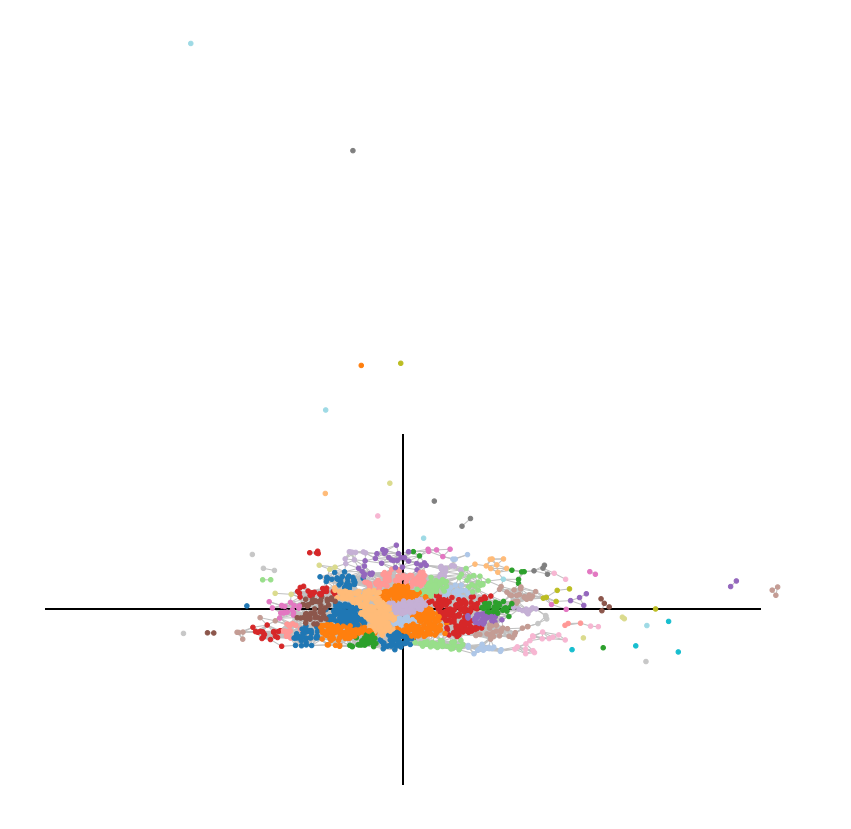

In [165]:
figure = plt.figure(figsize=(15,15))
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)
mc.draw_graph(matrix, clusters, pos=positions, node_size=20, with_labels=False, edge_color="silver")
figure.savefig("Clustering Results from PCA of Students' sessions (Markov Clustering).png")

In [166]:
# predicted_labels
MC_silhouette_score = silhouette_score(preprocessed_data, predicted_labels)

print("inflation:", inflation,
      "\nexpansion:", expansion,
      "\nmodularity:", Q,
      "\nsilhouette score", MC_silhouette_score)

inflation: 2.2 
expansion: 2 
modularity: 0.9070152545347873 
silhouette score 0.27978747444911156


# Comparing the methods:

In [167]:
print('highest silhouette_score for kmeans:',kmeans_silhouette_scores[0])
print('highest silhouette_score for agglomerative_clustering:',agglomerative_clustering_silhouette_scores[0])
print('highest silhouette_score for Fuzzy C-Means:',FCM_silhouette_scores[0])
print('highest silhouette_score for EM:',EM_silhouette_scores[0])
print('highest silhouette_score for Markov Clustering: 2components{}clusters, {}'.format(len(clusters),MC_silhouette_score))

                                                              

highest silhouette_score for kmeans: ('2components3clusters', 0.3697681505642192)
highest silhouette_score for agglomerative_clustering: ('5components2clusters', 0.889546720337076)
highest silhouette_score for Fuzzy C-Means: ('2components2clusters', 0.357493444833745)
highest silhouette_score for EM: ('2components2clusters', 0.7742828460713749)
highest silhouette_score for Markov Clustering: 2components90clusters, 0.27978747444911156


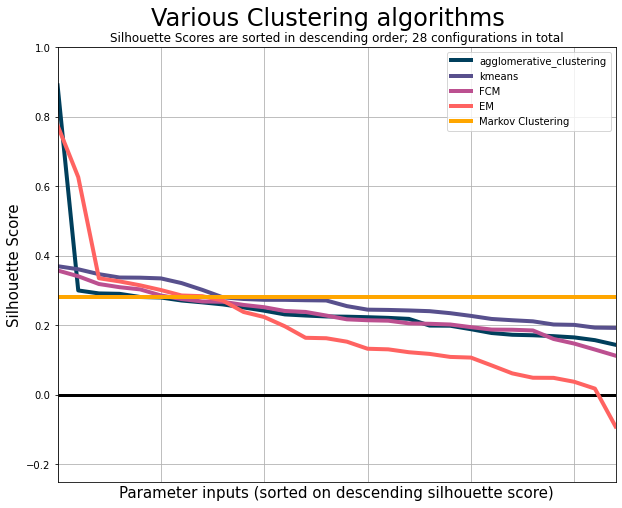

In [168]:
def create_plot():
    hex_values = ["#003f5c","#58508d","#bc5090","#ff6361","#ffa600"]

    fig = plt.figure(figsize=(10, 8))
    max_clusters = 7
    
    plt.plot(
        range(len(agglomerative_clustering_silhouette_scores)),
        [score[1] for score in agglomerative_clustering_silhouette_scores],
        c=hex_values[0],
        label="agglomerative_clustering",
        linewidth=4
    )

    

    plt.plot(
        range(len(kmeans_silhouette_scores)),
        [score[1] for score in kmeans_silhouette_scores],
        c=hex_values[1],
        label="kmeans",
        linewidth=4
    )

    plt.plot(
        range(len(FCM_silhouette_scores)),
        [score[1] for score in FCM_silhouette_scores],
        c=hex_values[2],
        label="FCM",
        linewidth=4
    )
    
    plt.plot(
        range(len(EM_silhouette_scores)),
        [score[1] for score in EM_silhouette_scores],
        c=hex_values[3],
        label="EM",
        linewidth=4
    )
    
    plt.plot(
        range(len(EM_silhouette_scores)),
        [MC_silhouette_score for i in range(len(EM_silhouette_scores))],
        c=hex_values[4],
        label="Markov Clustering",
        linewidth=4
    )
    
    plt.grid()
    plt.title('Silhouette Scores are sorted in descending order; 28 configurations in total',fontsize=12)
    plt.suptitle('Various Clustering algorithms',fontsize=24, y=0.95)
#     plt.title('Various Clustering Algoritms', fontsize=20)
    plt.ylabel('Silhouette Score', fontsize=15)
    plt.xlabel('Parameter inputs (sorted on descending silhouette score)', fontsize=15)
    plt.hlines(y = 0, xmin=0, xmax=len(EM_silhouette_scores), color='black', linewidth=3)

    plt.ylim([-0.25,1])
    plt.xlim([0,len(EM_silhouette_scores)-1])
#     plt.xticks(np.arange(2, 42, step=1))
    plt.legend()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    plt.show()

    fig.savefig('various_clustering_algoritms.jpg')
create_plot()

In [83]:
len(EM_silhouette_scores)

28

# Importances in PCA 
### (dit moet een functie worden waar je verschillende parameters in kan vullen)

https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

In [75]:
def PCA_explainer(n):
    FCM_pipe["preprocessor"]['pca'].n_components = n
    FCM_pipe.fit(students)
    
#     print(FCM_pipe)

    pca = FCM_pipe["preprocessor"]['pca']
    
#     print(pca.explained_variance_ratio_)
    
    i=1
    importances = {}

    for components in pca.components_:
        importances['component_{}'.format(i)] = {}
#         print('\ncomponent',i)
        for importance in list(components):
            importances['component_{}'.format(i)][str(students.columns[list(components).index(importance)])] = round(importance,2)
#             print(data.columns[list(components).index(importance)], round(importance,2))
        i+=1
    
    plt.figure(figsize=(4*i,10))
    for i in range(1,n+1):
        width = 1/n
        
        component = importances['component_{}'.format(i)]     
        plt.bar(range(len(component)), component.values(), width=1/n, align='center',label='component {}'.format(i))
        plt.xticks(range(len(components)), list(component.keys()), rotation=70)
    
    plt.ylim([-1,1])
    plt.legend()
    plt.grid()
    
    
# PCA_explainer(6)
# PCA_explainer(2)

In [76]:
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

,interval,stars,scores,clippy_hint,block_try_counter
0,-0.108367,-0.959679,0.013820,2.108327,-0.567477
1,-0.105436,0.161897,2.015554,2.108327,-0.850811
2,-0.106105,1.456024,0.367787,-1.104239,-0.306876
3,-0.105739,0.291310,0.745085,0.823301,-0.416854
4,-0.104822,1.456024,1.650464,-0.301097,-0.603053
...,...,...,...,...,...
1731,-0.110779,-0.269478,0.248616,1.649389,-0.156014
1732,-0.109244,-1.563605,0.074526,-1.104239,-0.631808
1733,-0.109642,-0.485166,-0.092134,-1.104239,-0.443033
1734,-0.111946,1.456024,-0.277131,-1.104239,2.077001


explained variances: [1.317417   1.04365217 0.97696793 0.92533262]
rations: [0.26333162 0.2086102  0.19528103 0.18495992]


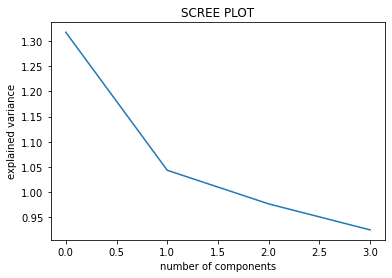

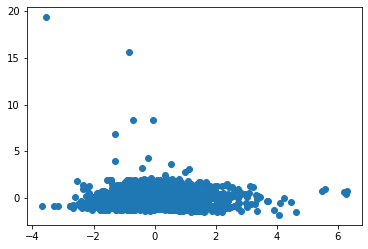

In [77]:
pcamodel = FCM_pipe["preprocessor"]['pca']
pcamodel.n_components = 4
pca = pcamodel.fit_transform(x)
pca.shape

print('explained variances:',pcamodel.explained_variance_)
print('rations:',pcamodel.explained_variance_ratio_)

plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('SCREE PLOT')
plt.show()

plt.scatter(pca[:, 0], pca[:, 1])



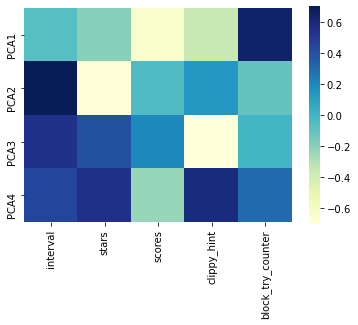

In [78]:
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")

C:\Users\s155633\.conda\envs\Thesis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
<ipython-input-79-c4516e16e0c6>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


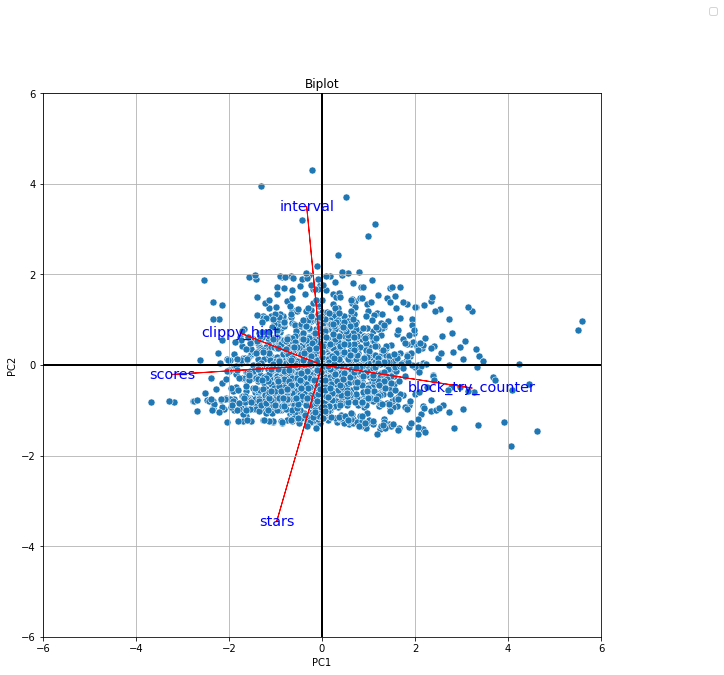

In [79]:
x = StandardScaler().fit_transform(students)
x = pd.DataFrame(x, columns=students.columns)
x

score = pca[:,0:2]
coeff = np.transpose(pcamodel.components_[0:2, :])
labels = list(x.columns)
fig = plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    palette=['#F79E02','#0074E1'],
)

for i in range(n):
    plt.arrow(0, 0, 5*coeff[i,0], 5*coeff[i,1],color = 'r',alpha = 1)
    if labels is None:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 5, coeff[i,1] * 5, labels[i], color = 'b', ha = 'center', va = 'center', fontsize = 'x-large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)

fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Biplot")
fig.show()
fig.savefig("Biplot.png")

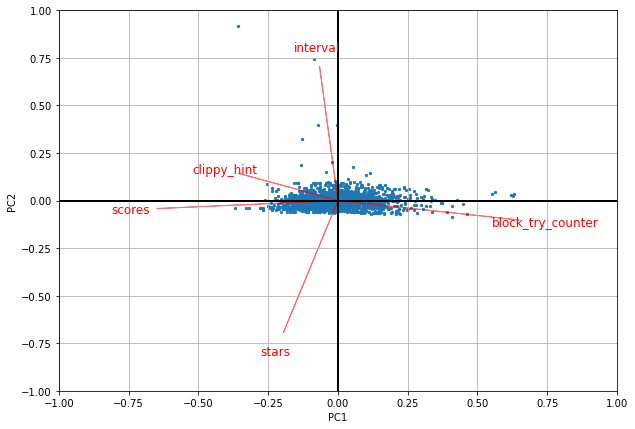

In [80]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center', fontsize = 'large')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.hlines(y = 0,xmax=6, xmin=-6, color='black', linewidth=2)
    plt.vlines(x = 0,ymax=6, ymin=-6, color='black', linewidth=2)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    
    fig.savefig('biplot_lelijk.png',bbox_inches='tight')

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(x.columns))
plt.show()

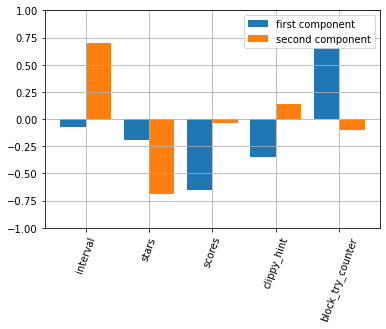

In [81]:
pca = FCM_pipe["preprocessor"]['pca']

pca.explained_variance_ratio_

i=1

importances = {}

for components in pca.components_:
    importances['component_{}'.format(i)] = {}
#     print('\ncomponent',i)
    for importance in list(components):
        importances['component_{}'.format(i)][str(students.columns[list(components).index(importance)])] = round(importance,2)
#         print(data.columns[list(components).index(importance)], round(importance,2))
    i+=1
    


# importances['component_1'] = sort_dict_on_keys(importances['component_1'])
# importances['component_2'] = sort_dict_on_keys(importances['component_2'])



# # Plot the importances
comp1 = importances['component_1']
comp2 = importances['component_2']

plt.bar(range(len(comp1)), comp1.values(), width=-0.4, align='edge',label='first component')
plt.bar(range(len(comp2)), comp2.values(), width=0.4, align='edge',label='second component')
plt.xticks(range(len(comp1)), list(comp1.keys()), rotation=70);

plt.ylim([-1,1])
plt.legend()
plt.grid()